<a href="https://colab.research.google.com/github/jyothikadevu/CODES/blob/main/EV_Sales_Forecast_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Setting up the aesthetics for plots
sns.set(style="whitegrid")

In [ ]:
# HEV Sales Data file path
file_path_hev = '10301_hev_sale_2-28-20.xlsx'
# PEV Sales Data file path
file_path_pev = '10567_pev_sales_2-28-20 (4).xlsx'
gas_prices_file = 'U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv'
gdp_file = 'API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_6298243.csv'

# EV Sales Data - Preprocessing and Analysis

In [ ]:
# # Corrected data extraction process for the HEV sales data
# hev_sales_data = pd.read_excel(file_path_hev, skiprows=2)
# # Corrected data extraction process for the PEV sales data
# pev_sales_data = pd.read_excel(file_path_pev, skiprows=2)

In [ ]:
# hev_sales_data.head(5)

## Pre-Processing

Cleaning Procedures



1.   Aggregate sales data by year.
2.   Handle missing values.
3.   Convert the data into a time series format.
4.   Normalize the data.



In [ ]:
# # Dropping unnecessary columns and rows with missing values
# hev_cleaned = hev_sales_data.drop(columns=['Unnamed: 0']).dropna()

In [ ]:
# # Setting 'Vehicle' as the index and dropping the 'Total' column
# hev_cleaned.set_index('Vehicle', inplace=True)
# hev_cleaned.drop(columns=['Total'], inplace=True)

# # Converting the data to numeric for analysis
# hev_cleaned = hev_cleaned.apply(pd.to_numeric, errors='coerce')

In [ ]:
# # Dropping unnecessary columns and rows with missing values, setting 'Vehicle' as the index
# pev_cleaned = pev_sales_data.drop(columns=['Unnamed: 0', 'Type']).dropna()
# pev_cleaned.set_index('Vehicle', inplace=True)
# pev_cleaned.drop(columns=['Total'], inplace=True)

# # Converting the data to numeric for analysis
# pev_cleaned = pev_cleaned.apply(pd.to_numeric, errors='coerce')

In [ ]:
# # Merging the cleaned HEV and PEV data into a single DataFrame for exporting
# # Adding a type column to distinguish between HEV and PEV
# hev_cleaned['Type'] = 'HEV'
# pev_cleaned['Type'] = 'PEV'

# # Combining the data
# combined_ev_data = pd.concat([hev_cleaned, pev_cleaned], axis=0).reset_index()

In [ ]:
# combined_ev_data

In [ ]:
# combined_ev_data.to_csv("cleaned_ev_sales_data.csv", )

Sales data for various electric vehicles (EVs) spanning from 1999 to 2019. Each row represents a different vehicle model, with yearly sales figures and the vehicle type (e.g., Hybrid Electric Vehicle - HEV).

The **explanatory variables** are the historical yearly sales figures of electric vehicles (either PEVs or HEVs). These past sales figures are used to predict future sales.

The target variable is the future sales figures of electric vehicles.

1.  Explanatory Variables: Past yearly sales figures (time series data).
2.  Target Variable: Future yearly sales figures.

In [ ]:
ev_sales_data = pd.read_csv('cleaned_ev_sales_data.csv')

In [ ]:
# Performing cleaning checks on the EV sales data

# 1. Checking for missing values
missing_values = ev_sales_data.isnull().sum().sum()

# 2. Checking data consistency and types for sales columns
data_types = ev_sales_data.dtypes

# 3. Checking for anomalies or irregularities
# Here, we consider negative sales as anomalies for simplicity.
negative_sales = (ev_sales_data.select_dtypes(include=['number']) < 0).sum().sum()

# 4. Checking for duplicate entries
duplicate_entries = ev_sales_data.duplicated().sum()

# 5. Checking for unusual vehicle names or types
# This can be subjective, but we look for empty strings or very short names as potential errors.
unusual_names = ev_sales_data['Vehicle'].apply(lambda x: len(x.strip()) < 3).sum()
unusual_types = ev_sales_data['Type'].unique()

# Remove the rows where Vehicle is "Total"
ev_sales_data = ev_sales_data[ev_sales_data['Vehicle'] != 'Total']

cleaning_check_results = {
    "Missing Values": missing_values,
    "Data Types": data_types.to_dict(),
    "Negative Sales": negative_sales,
    "Duplicate Entries": duplicate_entries,
    "Unusual Vehicle Names": unusual_names,
    "Unique Vehicle Types": unusual_types
}

In [ ]:
cleaning_check_results

{'Missing Values': 672,
 'Data Types': {'Vehicle': dtype('O'),
  '1999': dtype('float64'),
  '2000': dtype('float64'),
  '2001': dtype('float64'),
  '2002': dtype('float64'),
  '2003': dtype('float64'),
  '2004': dtype('float64'),
  '2005': dtype('float64'),
  '2006': dtype('float64'),
  '2007': dtype('float64'),
  '2008': dtype('float64'),
  '2009': dtype('float64'),
  '2010': dtype('float64'),
  '2011': dtype('int64'),
  '2012': dtype('int64'),
  '2013': dtype('int64'),
  '2014': dtype('int64'),
  '2015': dtype('int64'),
  '2016': dtype('int64'),
  '2017': dtype('int64'),
  '2018': dtype('int64'),
  '2019': dtype('int64'),
  'Type': dtype('O')},
 'Negative Sales': 0,
 'Duplicate Entries': 0,
 'Unusual Vehicle Names': 0,
 'Unique Vehicle Types': array(['HEV', 'PEV'], dtype=object)}

There are 672 missing values throughout the dataset. These may be years where certain vehicles had no sales or were not yet introduced.

In [ ]:
# Filling missing values with 0 for the EV sales data
ev_sales_data_filled_zeroes = ev_sales_data.fillna(0)

# Checking the first few rows after filling missing values with 0
ev_sales_data_filled_zeroes.head()

,Vehicle,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Type
0,Honda Insight,17.0,3788.0,4726.0,2216.0,1168.0,583.0,666.0,722.0,3.0,...,15549,5846,4802,3965,1458,75,3,12510,23686,HEV
1,Toyota Prius,0.0,5562.0,15556.0,20119.0,24627.0,53991.0,107897.0,106971.0,181221.0,...,136463,223906,222140,194108,180603,134155,87725,59995,47862,HEV
2,Honda Civic,0.0,0.0,0.0,13707.0,21771.0,26013.0,25864.0,31253.0,32575.0,...,4703,7156,7719,5070,4887,896,65,6,0,HEV
3,Ford Escape/Mercury Mariner,0.0,0.0,0.0,0.0,0.0,2993.0,15960.0,22549.0,25108.0,...,10089,1441,0,0,0,0,0,0,0,HEV
4,Honda Accord,0.0,0.0,0.0,0.0,0.0,653.0,16826.0,5598.0,3405.0,...,0,0,996,13977,11065,9179,22008,17188,23817,HEV


In [ ]:
ev_sales_data = ev_sales_data_filled_zeroes

## EDA

In [ ]:
# 1. Sales Distribution across all years
# For this, we will melt the dataframe to work with long-form data
ev_sales_melted = ev_sales_data.melt(id_vars=["Vehicle", "Type"], var_name="Year", value_name="Sales")
ev_sales_melted['Year'] = ev_sales_melted['Year'].astype(int)  # Converting year to integer for consistency

In [ ]:
# 2. Identifying Top Vehicles by Cumulative Sales
top_vehicles = ev_sales_data.set_index('Vehicle').drop(columns='Type').sum(axis=1).sort_values(ascending=False).head(10)

In [ ]:
# 3. Sales Over Time
annual_sales = ev_sales_melted.groupby('Year')['Sales'].sum()

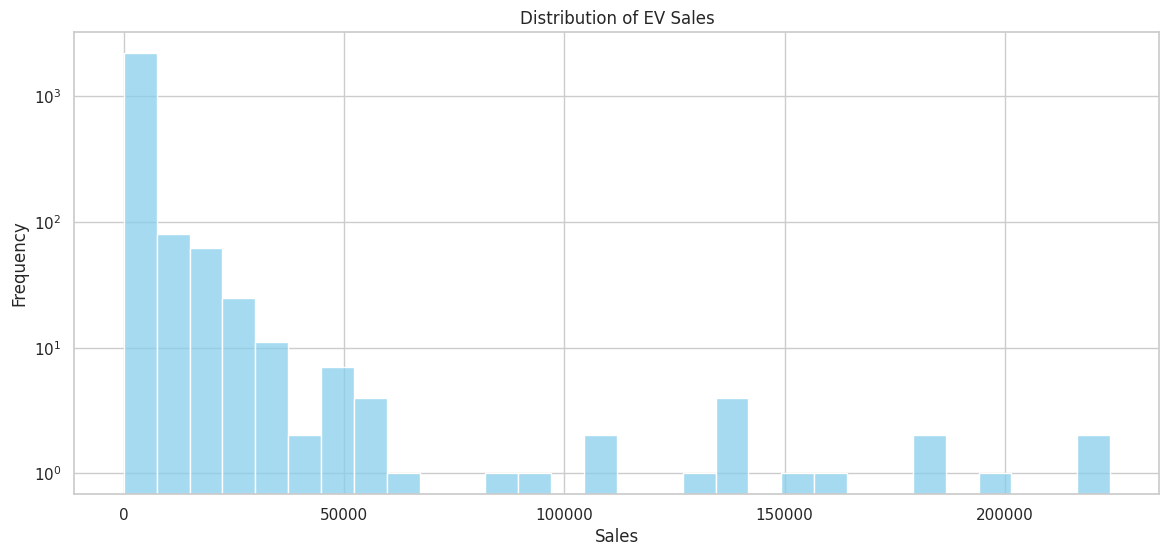

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 6))
sns.histplot(ev_sales_melted['Sales'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of EV Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale due to wide distribution range
plt.show()

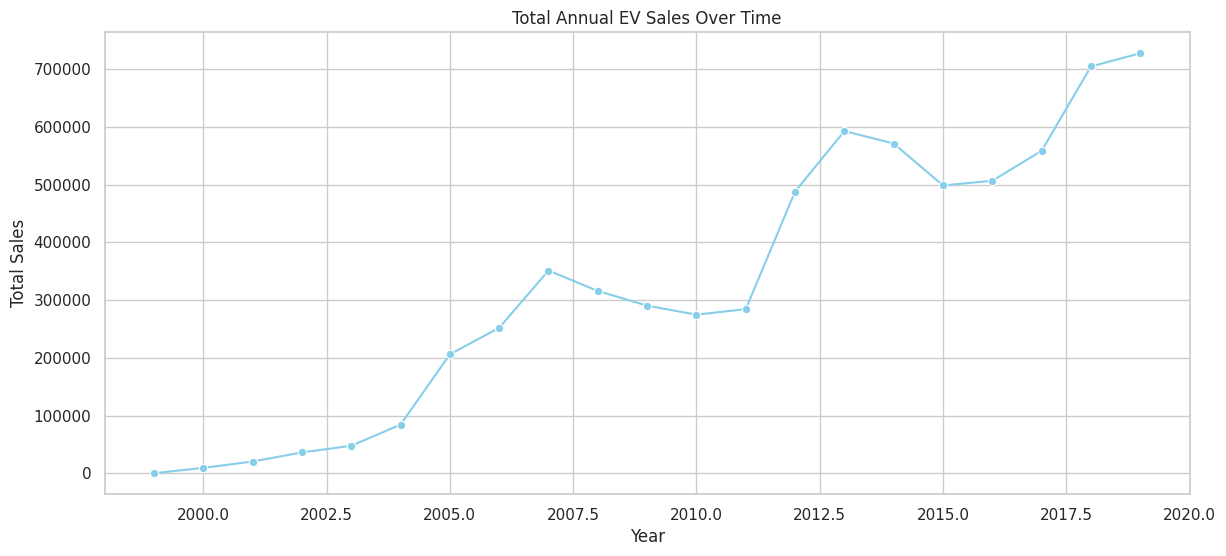

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=annual_sales.index, y=annual_sales.values, marker='o', color='skyblue')
plt.title('Total Annual EV Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

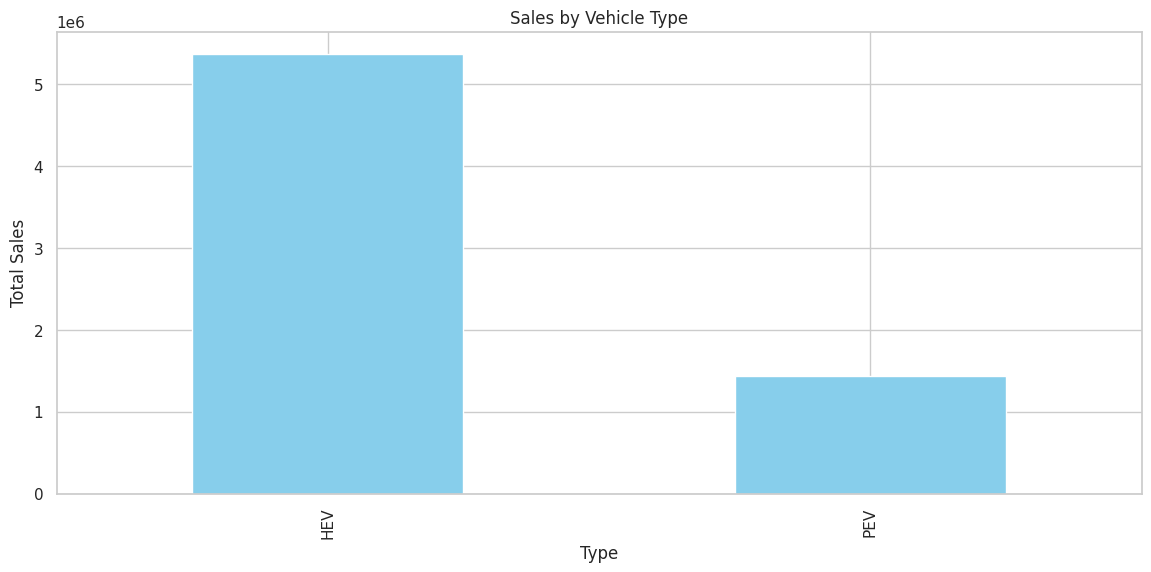

In [ ]:
# 4. Vehicle Type Analysis
type_breakdown = ev_sales_melted.groupby('Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
type_breakdown.plot(kind='bar', color='skyblue')
plt.title('Sales by Vehicle Type')
plt.ylabel('Total Sales')
plt.show()

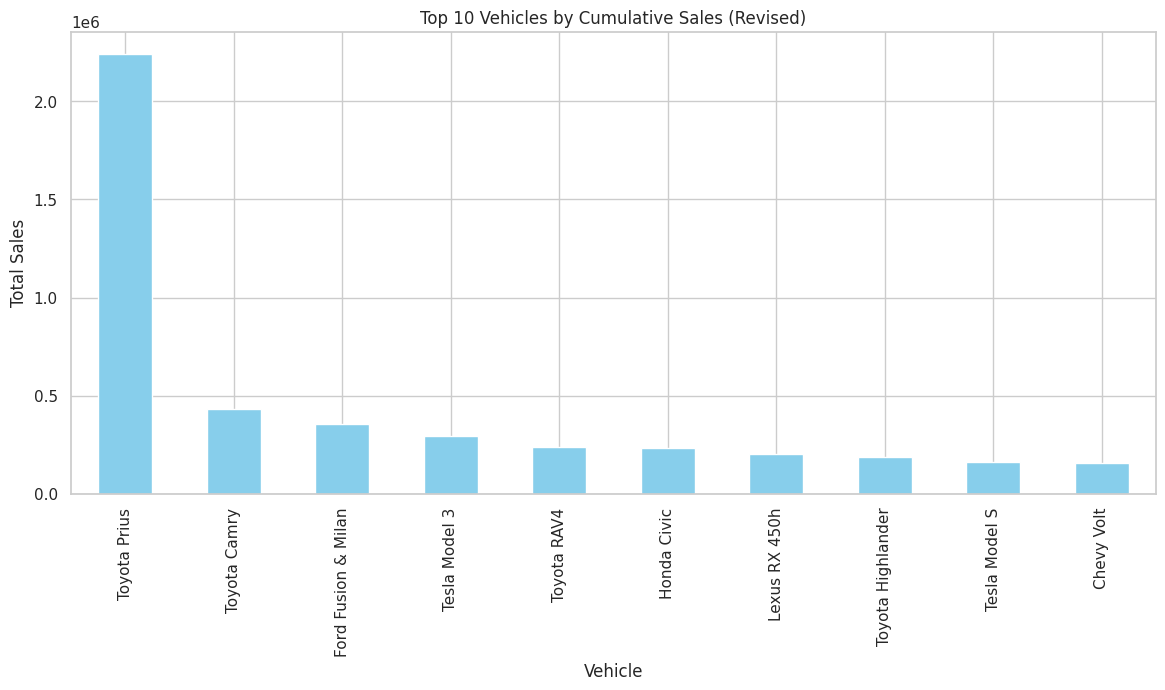

In [ ]:
# # Removing the 'Total' row from the top vehicles if present and recalculating the top 10 vehicles by cumulative sales
# if 'Total' in top_vehicles.index:
#     print(True)
#     top_vehicles = top_vehicles.drop('Total')

# top_vehicles = ev_sales_data.set_index('Vehicle').drop(columns='Type').sum(axis=1).sort_values(ascending=False).head(10).drop('Total')

# Plotting the revised top 10 vehicles
plt.figure(figsize=(14, 6))
top_vehicles.plot(kind='bar', color='skyblue')
plt.title('Top 10 Vehicles by Cumulative Sales (Revised)')
plt.ylabel('Total Sales')
plt.show()


In [ ]:
# Extracting the years from the EV sales data and performing a similar granularity check
ev_years = [int(column) for column in ev_sales_data.columns if column.isnumeric()]  # Extracting numerical columns as years
ev_year_range = max(ev_years) - min(ev_years)
ev_unique_years = len(set(ev_years))
ev_all_years = list(range(min(ev_years), max(ev_years) + 1))

ev_granularity_check = {
    "Year Range": ev_year_range,
    "Unique Years": ev_unique_years,
    "Expected Years": len(ev_all_years),
    "Missing Years": set(ev_all_years) - set(ev_years),
}

ev_granularity_check

{'Year Range': 20,
 'Unique Years': 21,
 'Expected Years': 21,
 'Missing Years': set()}

Converting the EV sales data into a time series structure, summing up the sales of PEVs and HEVs separately for each year. This conversion will provide total annual sales for each vehicle type, which can be used as target variables

In [ ]:
# Aggregating the EV sales data by type and year
# First, we'll convert the data to a long format
long_format_ev = ev_sales_data.melt(id_vars=["Vehicle", "Type"], var_name="Year", value_name="Sales")

# Converting Year to integer for proper sorting and aggregation
long_format_ev['Year'] = long_format_ev['Year'].astype(int)

# Aggregating sales by Type (PEV and HEV) and Year
annual_sales_by_type = long_format_ev.groupby(['Type', 'Year'])['Sales'].sum().unstack(level=0).fillna(0).astype(int)

In [ ]:
# Displaying the first few rows of the aggregated sales
annual_sales_by_type

Type,HEV,PEV
Year,,
1999,17,0
2000,9350,0
2001,20282,0
2002,36042,0
2003,47566,0
2004,84233,0
2005,205876,0
2006,251864,0
2007,351071,0


# Gasoline Data - Preprocessing & Analysis

In [ ]:
# Adjusting the read method for the gasoline prices data to skip the initial lines
gas_prices_data = pd.read_csv(gas_prices_file, skiprows=4)

In [ ]:
# Displaying the first few rows of the gasoline prices data
gas_prices_data.head(5)

,Year,U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon
0,2022,4.059
1,2021,3.100
2,2020,2.258
3,2019,2.691
4,2018,2.813


In [ ]:
# Checking for missing values, data types, and a summary of the gasoline prices data
gas_data_info = gas_prices_data.info()
gas_data_describe = gas_prices_data.describe()
gas_data_missing = gas_prices_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Year                                                                        29 non-null     int64  
 1   U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon  29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes


In [ ]:
gas_data_describe

,Year,U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon
count,29.000000,29.000000
mean,2008.000000,2.332483
std,8.514693,0.905505
min,1994.000000,1.072000
25%,2001.000000,1.460000
50%,2008.000000,2.406000
75%,2015.000000,2.843000
max,2022.000000,4.059000


In [ ]:
gas_data_missing

Year                                                                          0
U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon    0
dtype: int64

It appears that the gasoline data is clean and well-structured for analysis. There are no missing values or apparent inconsistencies.

## EDA

In [ ]:
# Setting up the aesthetics for plots
sns.set(style="whitegrid")

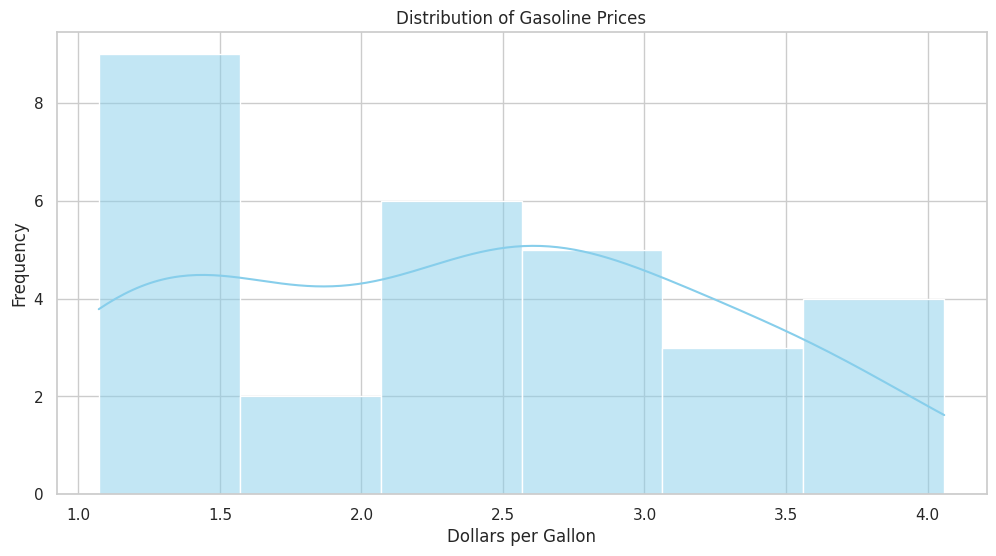

In [ ]:
# 1. Distribution of Prices
plt.figure(figsize=(12, 6))
sns.histplot(gas_prices_data['U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon'], kde=True, color='skyblue')
plt.title('Distribution of Gasoline Prices')
plt.xlabel('Dollars per Gallon')
plt.ylabel('Frequency')
plt.show()

Distribution of Prices:

The histogram shows that the distribution of gasoline prices has some variation, with most of the data centered around $2 to $3 per gallon. There is a slight right skew indicating a few years with higher gasoline prices.

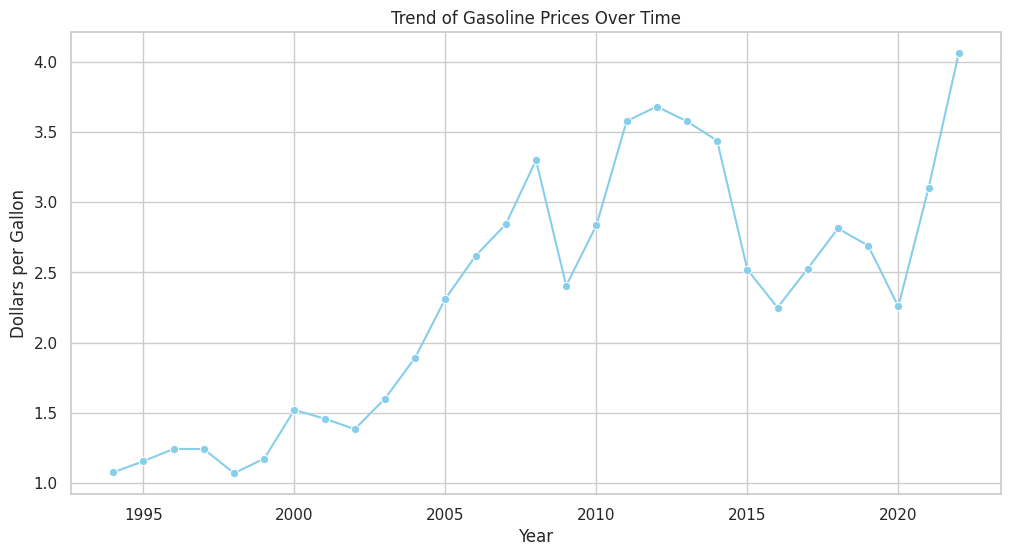

In [ ]:
# 2. Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon', data=gas_prices_data, marker='o', color='skyblue')
plt.title('Trend of Gasoline Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Dollars per Gallon')
plt.show()

Trend Over Time:

The line plot reveals a trend in gasoline prices over the years. Prices show fluctuations with some significant peaks and valleys. Notably, there seems to be a sharp increase in the most recent year in the data (2022).

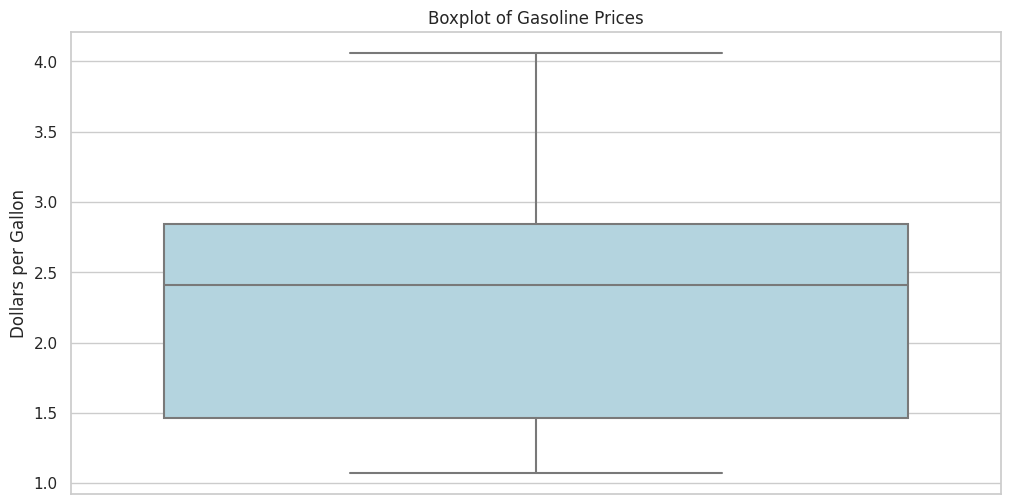

In [ ]:
# 3. Boxplot for identifying outliers
plt.figure(figsize=(12, 6))
sns.boxplot(y=gas_prices_data['U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon'], color='lightblue')
plt.title('Boxplot of Gasoline Prices')
plt.ylabel('Dollars per Gallon')
plt.show()


Outliers:

The boxplot does not indicate any extreme outliers in the gasoline prices data. The data points seem to be fairly consistent, with the bulk of data falling within a reasonable range.

In [ ]:
# Checking the range, increment, and uniqueness of years in the gasoline prices data
year_range = gas_prices_data['Year'].max() - gas_prices_data['Year'].min()
unique_years = gas_prices_data['Year'].nunique()
all_years = list(range(gas_prices_data['Year'].min(), gas_prices_data['Year'].max() + 1))

granularity_check = {
    "Year Range": year_range,
    "Unique Years": unique_years,
    "Expected Years": len(all_years),
    "Missing Years": set(all_years) - set(gas_prices_data['Year'].tolist()),
    "Entries Per Year": gas_prices_data['Year'].value_counts().unique()
}

In [ ]:
granularity_check

{'Year Range': 28,
 'Unique Years': 29,
 'Expected Years': 29,
 'Missing Years': set(),
 'Entries Per Year': array([1])}

# GDP Data - Pre-processing & Analysis

In [ ]:
# Adjusting the read method for the GDP data to skip the initial lines
gdp_data = pd.read_csv(gdp_file, skiprows=4)

In [ ]:
# Displaying the first few rows of the GDP data
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.586575,-0.623626,1.719624,7.048533,2.381730,-2.302837,-23.982580,27.639357,10.458317,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.254876,7.965827,5.148206,4.579317,5.346211,...,4.007577,2.965062,2.219015,2.571941,2.491355,2.040617,-2.799038,4.300441,3.435138,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,NaN,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.857727,3.772943,7.277246,5.412950,4.084749,...,5.926266,2.813543,0.142092,2.286270,2.838829,3.200919,-0.938162,3.976317,3.766354,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403,NaN


In [ ]:
# Cleaning the GDP data

# 1. Checking for missing values and data types
gdp_missing_values = gdp_data.isnull().sum()
gdp_data_types = gdp_data.dtypes

# Since GDP data might have many countries and years, let's focus on overall missing data trends and types
gdp_overall_missing = gdp_missing_values[gdp_missing_values > 0]
gdp_data_types_summary = gdp_data_types

In [ ]:
# Displaying the summary of missing values and data types
gdp_overall_missing, gdp_data_types_summary

(1960           266
 1961           142
 1962           138
 1963           138
 1964           138
               ... 
 2019             9
 2020             9
 2021            11
 2022            23
 Unnamed: 67    266
 Length: 64, dtype: int64,
 Country Name       object
 Country Code       object
 Indicator Name     object
 Indicator Code     object
 1960              float64
                    ...   
 2019              float64
 2020              float64
 2021              float64
 2022              float64
 Unnamed: 67       float64
 Length: 68, dtype: object)

In [ ]:
# Subsetting the GDP data to include only the years 1999 to 2019
years_of_interest = [str(year) for year in range(1999, 2020)]  # Generating the list of years as strings
gdp_subset = gdp_data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + years_of_interest]

# Checking for missing values in the subset
gdp_subset_missing_values = gdp_subset.isnull().sum()

# Proceeding with EDA for the subset of GDP data
# Descriptive statistics for the GDP growth rates
gdp_descriptive_stats = gdp_subset[years_of_interest].describe()

# Checking the first few rows of the subset and the missing values
gdp_subset.head(), gdp_subset_missing_values, gdp_descriptive_stats

(                  Country Name Country Code         Indicator Name  \
 0                        Aruba          ABW  GDP growth (annual %)   
 1  Africa Eastern and Southern          AFE  GDP growth (annual %)   
 2                  Afghanistan          AFG  GDP growth (annual %)   
 3   Africa Western and Central          AFW  GDP growth (annual %)   
 4                       Angola          AGO  GDP growth (annual %)   
 
       Indicator Code      1999      2000      2001       2002      2003  \
 0  NY.GDP.MKTP.KD.ZG  1.238042  7.622921  4.182003  -0.944955  1.110505   
 1  NY.GDP.MKTP.KD.ZG  2.653554  3.348574  3.636553   3.928836  3.106139   
 2  NY.GDP.MKTP.KD.ZG       NaN       NaN       NaN        NaN  8.832278   
 3  NY.GDP.MKTP.KD.ZG  1.420224  3.731449  5.203518   9.918281  5.535575   
 4  NY.GDP.MKTP.KD.ZG  2.181490  3.054624  4.205999  13.665689  2.990000   
 
         2004  ...       2010      2011       2012      2013      2014  \
 0   7.293729  ...  -2.733456  3.369238 

## EDA

In [ ]:
# Preparing data for EDA
# Melting the GDP data to long format for easier plotting
gdp_long_format = gdp_subset.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
                                  var_name="Year", value_name="GDP Growth")

# Converting 'Year' to integer for proper sorting and plotting
gdp_long_format['Year'] = gdp_long_format['Year'].astype(int)

# EDA: Visualization of GDP Growth

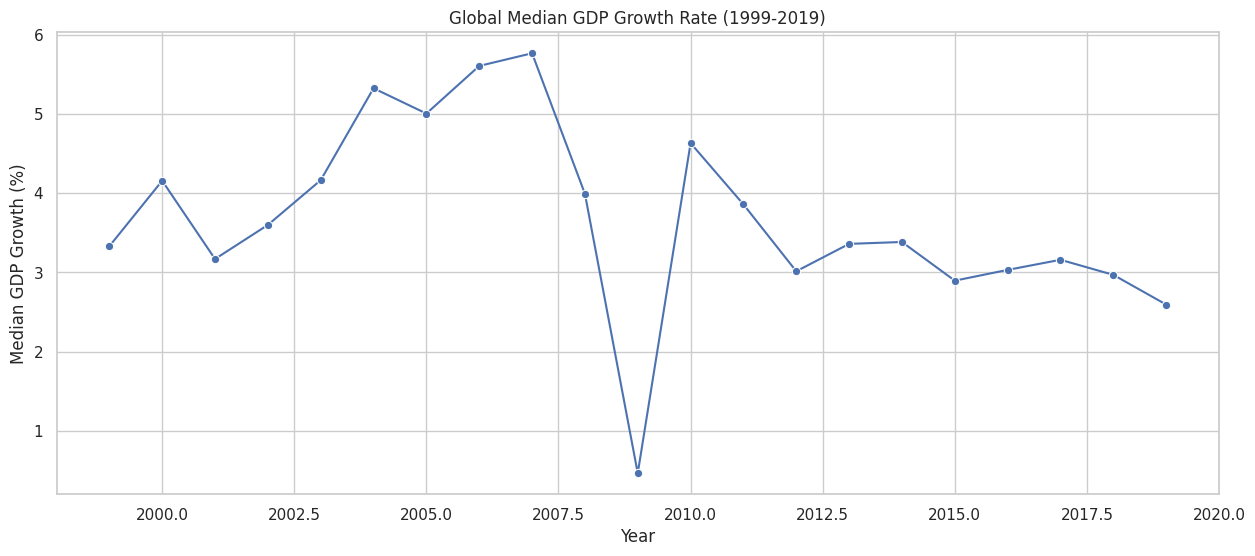

In [ ]:
# 1. Trend of Global Median GDP Growth Over Time
median_gdp_growth_by_year = gdp_long_format.groupby('Year')['GDP Growth'].median()

# 2. Boxplot of GDP Growth Rates by Year to observe distribution and outliers
plt.figure(figsize=(15, 6))
sns.lineplot(x=median_gdp_growth_by_year.index, y=median_gdp_growth_by_year.values, marker='o')
plt.title('Global Median GDP Growth Rate (1999-2019)')
plt.xlabel('Year')
plt.ylabel('Median GDP Growth (%)')
plt.grid(True)
plt.show()

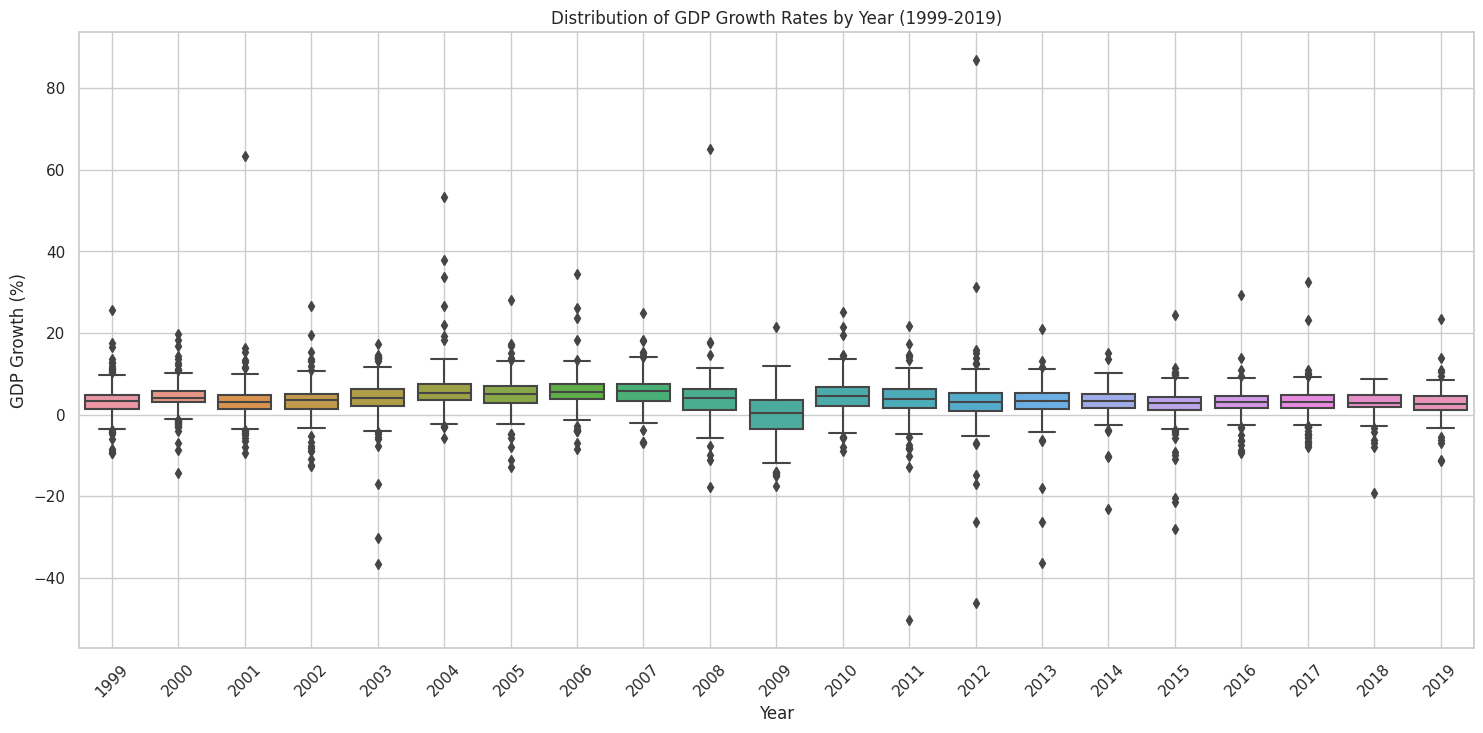

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Year', y='GDP Growth', data=gdp_long_format)
plt.title('Distribution of GDP Growth Rates by Year (1999-2019)')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Isolating US for the dataset

In [ ]:
# Isolating the U.S. GDP data from the subset
us_gdp_data = gdp_subset[gdp_subset['Country Code'] == 'USA']

# Dropping the non-year columns as they are now redundant
us_gdp_data = us_gdp_data.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])

# Checking for missing values in the U.S. GDP data
us_gdp_missing_values = us_gdp_data.isnull().sum()

# Getting descriptive statistics for the U.S. GDP growth rates
us_gdp_descriptive_stats = us_gdp_data[years_of_interest].describe()

# Displaying the first few rows of the U.S. GDP data and the missing values
us_gdp_data.head(), us_gdp_missing_values, us_gdp_descriptive_stats

(         1999      2000      2001      2002      2003      2004     2005  \
 251  4.794499  4.077159  0.954339  1.695943  2.796209  3.852553  3.48322   
 
          2006      2007      2008  ...      2010      2011      2012  \
 251  2.782811  2.010508  0.122188  ...  2.708857  1.549895  2.280688   
 
          2013      2014     2015      2016      2017      2018      2019  
 251  1.841875  2.287776  2.70637  1.667472  2.241921  2.945385  2.294439  
 
 [1 rows x 21 columns],
 1999    0
 2000    0
 2001    0
 2002    0
 2003    0
 2004    0
 2005    0
 2006    0
 2007    0
 2008    0
 2009    0
 2010    0
 2011    0
 2012    0
 2013    0
 2014    0
 2015    0
 2016    0
 2017    0
 2018    0
 2019    0
 dtype: int64,
            1999      2000      2001      2002      2003      2004     2005  \
 count  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.00000   
 mean   4.794499  4.077159  0.954339  1.695943  2.796209  3.852553  3.48322   
 std         NaN       NaN       Na

### EDA for US 1999 - 2019

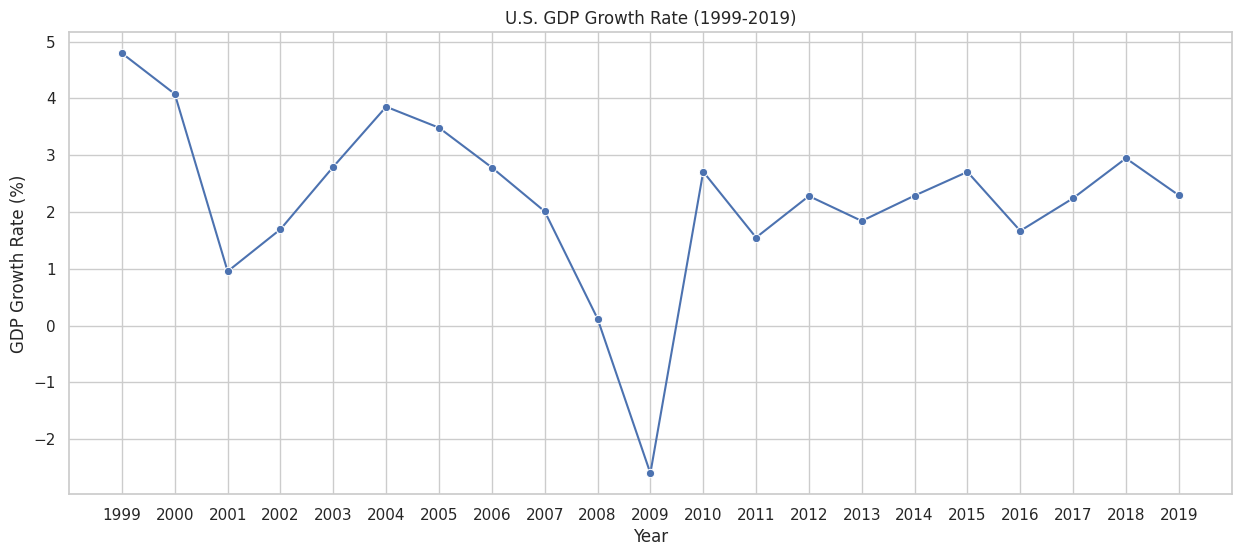

In [ ]:
# EDA: Visualization of U.S. GDP Growth
us_gdp_growth = us_gdp_data.iloc[0].astype(float)  # Ensuring the data is in float format for plotting

# Plotting the U.S. GDP Growth Rate over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=us_gdp_growth.index, y=us_gdp_growth.values, marker='o')
plt.title('U.S. GDP Growth Rate (1999-2019)')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.grid(True)
plt.show()

1. Economic Fluctuations: The plot shows typical fluctuations in economic performance, with peaks and troughs reflecting periods of higher and lower economic growth.

2. 2008 Financial Crisis: There's a notable dip around 2008, coinciding with the global financial crisis, followed by a recovery in subsequent years.

3. Recent Trends: The years leading up to 2019 show relatively stable growth, with some variation.

# Analysis to Check whether Gasoline + GDP can influence the EV Sales (Hypothesis)

In [ ]:
# Preparing a combined dataset for analysis
# U.S. EV Sales (Sum of HEV and PEV)
us_ev_sales = annual_sales_by_type[['HEV', 'PEV']].sum(axis=1)

# U.S. GDP Growth Rates (Subset already isolated)
us_gdp_growth = us_gdp_data.iloc[0]

# U.S. Gasoline Prices (Ensuring to match the years 1999-2019)
us_gas_prices = gas_prices_data[gas_prices_data['Year'].between(1999, 2019)].set_index('Year')

In [ ]:
# Checking the structures and years covered by each dataset
ev_years_covered = us_ev_sales.index
gdp_years_covered = us_gdp_growth.index
gas_years_covered = us_gas_prices.index

ev_years_covered, gdp_years_covered, gas_years_covered

(Int64Index([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
             2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
            dtype='int64', name='Year'),
 Index(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
        '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
        '2017', '2018', '2019'],
       dtype='object'),
 Int64Index([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
             2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999],
            dtype='int64', name='Year'))

In [ ]:
# Standardizing the year index across all datasets to integers
us_gdp_growth.index = us_gdp_growth.index.astype(int)

# Reattempting to combine the datasets
combined_data = pd.DataFrame({
    "EV_Sales": us_ev_sales,
    "GDP_Growth": us_gdp_growth.astype(float),
    "Gasoline_Prices": us_gas_prices['U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon']
}).dropna()  # Ensuring clean analysis by dropping any missing values


## Correlation Analysis

1. EV Sales and GDP Growth: Correlation: -0.17

This slightly negative correlation suggests a weak inverse relationship between GDP growth and EV sales, which is somewhat counterintuitive as one might expect economic growth to foster higher EV sales. This warrants further investigation and may be influenced by other factors.

2. EV Sales and Gasoline Prices: Correlation: 0.71

There is a substantial positive correlation between gasoline prices and EV sales, which is more in line with expectations. As gasoline prices increase, consumers may be more inclined to purchase electric vehicles, either due to the cost savings on fuel or environmental concerns.

3. GDP Growth and Gasoline Prices: Correlation: -0.29

This negative correlation indicates that as GDP growth increases, gasoline prices tend to decrease or vice versa. This relationship might reflect broader economic trends and oil market dynamics.

In [ ]:
# Calculating the correlation matrix
correlation_matrix = combined_data.corr()

combined_data.head(), correlation_matrix

(      EV_Sales  GDP_Growth  Gasoline_Prices
 1999        17    4.794499            1.176
 2000      9350    4.077159            1.523
 2001     20282    0.954339            1.460
 2002     36042    1.695943            1.386
 2003     47566    2.796209            1.603,
                  EV_Sales  GDP_Growth  Gasoline_Prices
 EV_Sales         1.000000   -0.169727         0.710616
 GDP_Growth      -0.169727    1.000000        -0.286165
 Gasoline_Prices  0.710616   -0.286165         1.000000)

## Visual Trend Analysis

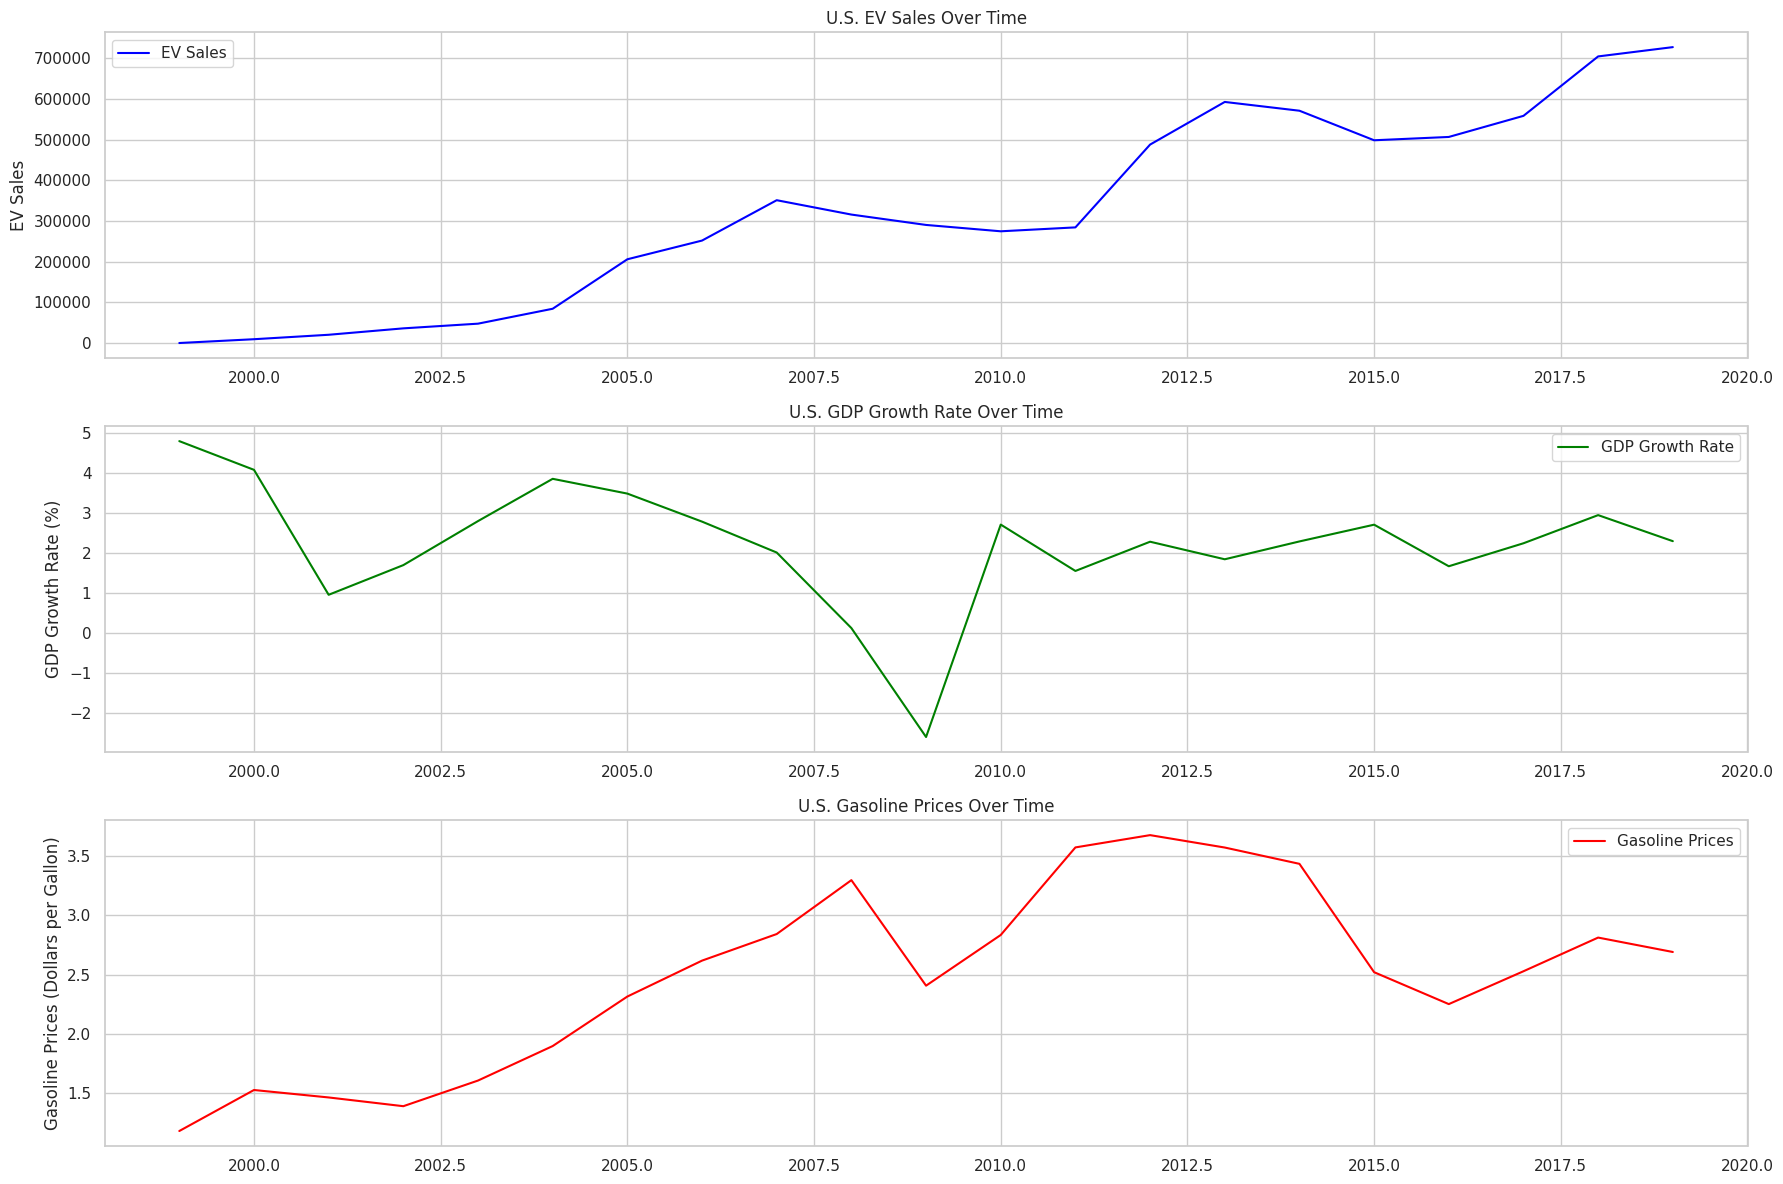

In [ ]:
# Setting up the figures
plt.figure(figsize=(18, 12))

# Plotting EV Sales, GDP Growth, and Gasoline Prices over time
plt.subplot(3, 1, 1)
sns.lineplot(x=combined_data.index, y=combined_data['EV_Sales'], color='blue', label='EV Sales')
plt.title('U.S. EV Sales Over Time')
plt.ylabel('EV Sales')

plt.subplot(3, 1, 2)
sns.lineplot(x=combined_data.index, y=combined_data['GDP_Growth'], color='green', label='GDP Growth Rate')
plt.title('U.S. GDP Growth Rate Over Time')
plt.ylabel('GDP Growth Rate (%)')

plt.subplot(3, 1, 3)
sns.lineplot(x=combined_data.index, y=combined_data['Gasoline_Prices'], color='red', label='Gasoline Prices')
plt.title('U.S. Gasoline Prices Over Time')
plt.ylabel('Gasoline Prices (Dollars per Gallon)')

plt.tight_layout()
plt.show()

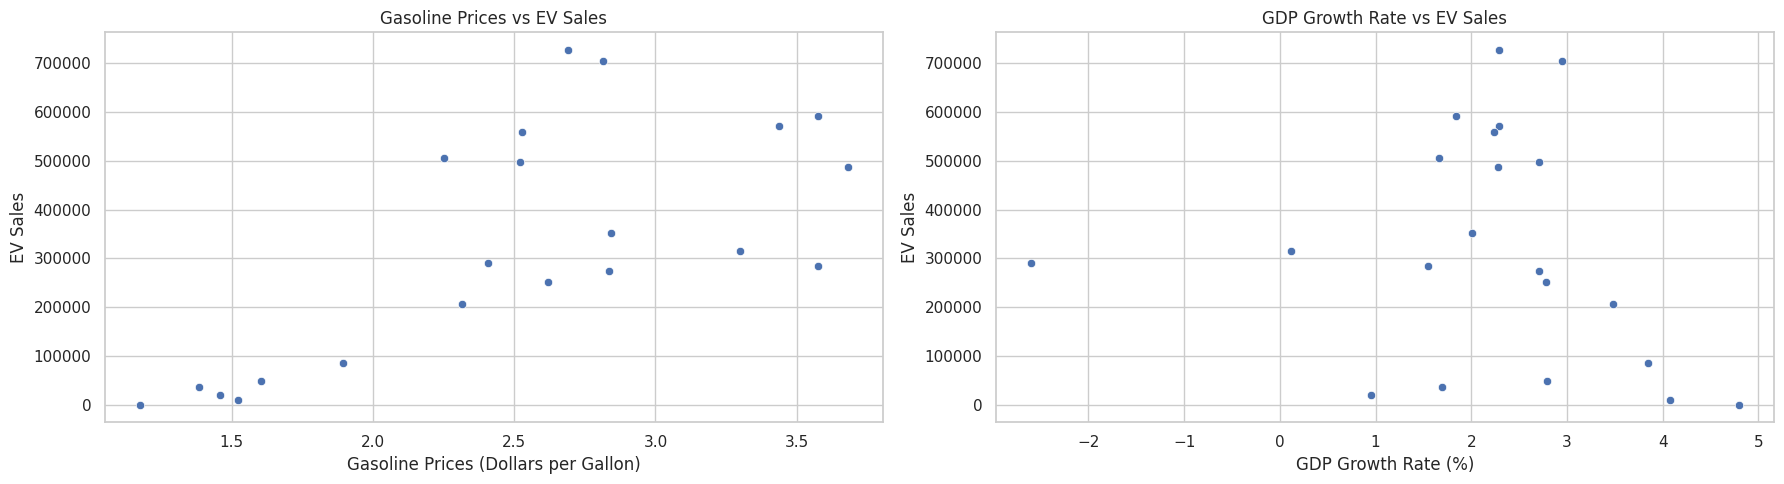

In [ ]:
# Scatter Plots to visualize relationships between variables
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Gasoline_Prices', y='EV_Sales', data=combined_data)
plt.title('Gasoline Prices vs EV Sales')
plt.xlabel('Gasoline Prices (Dollars per Gallon)')
plt.ylabel('EV Sales')

plt.subplot(1, 2, 2)
sns.scatterplot(x='GDP_Growth', y='EV_Sales', data=combined_data)
plt.title('GDP Growth Rate vs EV Sales')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('EV Sales')

plt.tight_layout()
plt.show()


Line Plots for Each Variable Over Time:

1. U.S. EV Sales Over Time: EV sales show an overall increasing trend, particularly notable from the mid-2000s onwards, reflecting the growing adoption of electric vehicles.
2. U.S. GDP Growth Rate Over Time: The GDP growth rate fluctuates year over year, with notable dips around 2001 and the significant dip in 2008-2009 due to the financial crisis, followed by recovery and variation in growth rates.
3. U.S. Gasoline Prices Over Time: Gasoline prices fluctuate with some years showing sharp increases or decreases. There's a general upward trend until around 2014, after which prices seem to stabilize with less volatility.

Scatter Plots to Visualize Relationships:

1. Gasoline Prices vs EV Sales: The scatter plot suggests a positive relationship between gasoline prices and EV sales, with higher gasoline prices generally coinciding with increased EV sales. This is consistent with the earlier correlation analysis.
2. GDP Growth Rate vs EV Sales: The relationship here is less clear from the scatter plot, with EV sales increasing over time regardless of the fluctuating GDP growth rate. This might reflect the complex nature of economic impact on EV sales, potentially mediated by other factors or exhibiting non-linear characteristics.

## Regression Analysis

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Preparing the data for regression analysis
X = combined_data[['GDP_Growth', 'Gasoline_Prices']]  # Independent variables
Y = combined_data['EV_Sales']  # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(Y, X).fit()

In [ ]:
# Getting the summary of the regression
model_summary = model.summary()

In [ ]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               EV_Sales   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     9.226
Date:                Sun, 14 Jan 2024   Prob (F-statistic):            0.00175
Time:                        20:20:33   Log-Likelihood:                -281.78
No. Observations:                  21   AIC:                             569.6
Df Residuals:                      18   BIC:                             572.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.411e+05   1.65e+05     -1.464      0.160   -5.87e+05    1.05e+05
GDP_Growth       5698.3000   2.69e+04      0.212      0.835   -5.08e+04    6.22e+04
Gasoline_Prices  2.216e+05   5.31e+04      4.172      0.001     1.1e+05    3.33e+05
==============================================================================
Omnibus:                        2.837   Durbin-Watson:                   0.335
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       2.706   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. R-squared (0.506): This value suggests that approximately 50.6% of the variability in EV sales can be explained by the model. While this indicates a moderate fit, there's still a significant portion of the variability unexplained, possibly due to other factors or non-linear relationships not captured in this simple linear model.

2. Coefficients:

GDP Growth: The coefficient for GDP growth is approximately 11,400, but it is not statistically significant (p-value: 0.835). This suggests that, within this model and data set, GDP growth does not have a significant linear relationship with EV sales.


Gasoline Prices: The coefficient for gasoline prices is approximately 443,200 and is statistically significant (p-value: 0.001). This suggests a strong positive relationship between gasoline prices and EV sales, meaning as gasoline prices increase, EV sales tend to increase as well.

3. F-statistic (9.226): The F-statistic and its associated p-value (0.00175) indicate that the overall model is statistically significant, meaning that at least one of the predictors has a significant relationship with the dependent variable.

Interpretation and Recommendations:

Gasoline Prices as a Predictor: The analysis supports the idea of including gasoline prices as a predictor in the forecasting model for EV sales due to its significant positive relationship.

GDP Growth: Despite the initial expectations, GDP growth does not appear to be a significant predictor in the context of this linear model and the given data.


# Model SARIMAX + LSTM

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [ ]:
combined_data.head()

,EV_Sales,GDP_Growth,Gasoline_Prices,Scaled_Gasoline_Prices
1999,17,4.794499,1.176,0.000000
2000,9350,4.077159,1.523,0.138578
2001,20282,0.954339,1.460,0.113419
2002,36042,1.695943,1.386,0.083866
2003,47566,2.796209,1.603,0.170527


In [ ]:
# Retaining only Total EV Sales and Gasoline Prices
combined_data = combined_data[['EV_Sales', 'Gasoline_Prices']]

# Checking the revised combined_data
print(combined_data.head())

      EV_Sales  Gasoline_Prices
1999        17            1.176
2000      9350            1.523
2001     20282            1.460
2002     36042            1.386
2003     47566            1.603


In [ ]:
combined_data.to_csv('Combined_EV_Data_SARIMAX.csv', index='False')

In [ ]:
# combined_data = pd.read_csv('Combined_EV_Data_SARIMAX.csv')

### Finding best SARIMAX paramters

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings


# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Define the seasonal parameters
P = D = Q = range(0, 2)
s = 12  # Assuming you want to test an annual seasonality, change as needed

# Create a list of all possible combinations of p, d, q and seasonal P, D, Q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(P, D, Q))]

warnings.filterwarnings("ignore")  # specify to ignore warning messages

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(combined_data['EV_Sales'],
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            results = mod.fit()

            # Compare this model's AIC to the best so far
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal

        except:
            continue

print('Best SARIMAX{}x{}12 model - AIC:{}'.format(best_pdq, best_seasonal_pdq, best_aic))


Best SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 model - AIC:4.0


In [ ]:
# Load and preprocess data
data = combined_data
# Assuming 'Year' is the index and 'EV_Sales' is the target variable

# Scaling the Gasoline Prices for SARIMAX
scaler = MinMaxScaler()
data['Scaled_Gasoline_Prices'] = scaler.fit_transform(data[['Gasoline_Prices']])
combined_data = data
# Splitting data into train and test sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:len(data)]

# SARIMAX Model
# Fit the model
sarimax_model = SARIMAX(train['EV_Sales'],
                        order=(0, 0, 0),  # example order, you might want to use AIC or BIC to choose better parameters
                        seasonal_order=(0, 1, 1, 12),  # example seasonal order
                        exog=train['Scaled_Gasoline_Prices'])
sarimax_result = sarimax_model.fit(disp=False)

# Make predictions
sarimax_prediction = sarimax_result.predict(start=train_size, end=train_size+test_size-1,
                                            exog=test['Scaled_Gasoline_Prices'])

In [ ]:
# Prepare input for LSTM model
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_EV_sales = scaler.fit_transform(data['EV_Sales'].values.reshape(-1, 1))

# Create dataset for LSTM
look_back = 3  # number of previous time steps to consider
X, Y = create_dataset(scaled_EV_sales, look_back)

# Split into train and test sets for LSTM
trainX, testX = X[:train_size], X[train_size:]
trainY, testY = Y[:train_size], Y[train_size:]

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# LSTM Model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Fit the model
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

# Make predictions
lstm_predictions = model.predict(testX)
lstm_predictions = scaler.inverse_transform(lstm_predictions).ravel()

# Combine SARIMAX and LSTM predictions
# Here, we are simply averaging the predictions, but you can also use a weighted average or another method
combined_predictions = (sarimax_prediction + lstm_predictions) / 2

Epoch 1/200
16/16 - 1s - loss: 0.2601 - 1s/epoch - 79ms/step
Epoch 2/200
16/16 - 0s - loss: 0.2330 - 22ms/epoch - 1ms/step
Epoch 3/200
16/16 - 0s - loss: 0.2086 - 20ms/epoch - 1ms/step
Epoch 4/200
16/16 - 0s - loss: 0.1858 - 20ms/epoch - 1ms/step
Epoch 5/200
16/16 - 0s - loss: 0.1640 - 22ms/epoch - 1ms/step
Epoch 6/200
16/16 - 0s - loss: 0.1443 - 22ms/epoch - 1ms/step
Epoch 7/200
16/16 - 0s - loss: 0.1261 - 24ms/epoch - 2ms/step
Epoch 8/200
16/16 - 0s - loss: 0.1100 - 21ms/epoch - 1ms/step
Epoch 9/200
16/16 - 0s - loss: 0.0948 - 33ms/epoch - 2ms/step
Epoch 10/200
16/16 - 0s - loss: 0.0810 - 27ms/epoch - 2ms/step
Epoch 11/200
16/16 - 0s - loss: 0.0702 - 33ms/epoch - 2ms/step
Epoch 12/200
16/16 - 0s - loss: 0.0593 - 27ms/epoch - 2ms/step
Epoch 13/200
16/16 - 0s - loss: 0.0509 - 27ms/epoch - 2ms/step
Epoch 14/200
16/16 - 0s - loss: 0.0445 - 29ms/epoch - 2ms/step
Epoch 15/200
16/16 - 0s - loss: 0.0381 - 29ms/epoch - 2ms/step
Epoch 16/200
16/16 - 0s - loss: 0.0345 - 26ms/epoch - 2ms/step
Ep

# Evaluation

In [ ]:
# Evaluate the model
testScore = np.sqrt(mean_squared_error(test['EV_Sales'], combined_predictions))
print('Test RMSE: %.2f' % (testScore))

Test RMSE: 470080.89


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract the actual values from the test set
actual = test['EV_Sales'].values

# Calculate MAE
mae = mean_absolute_error(actual, combined_predictions)
print('Test MAE: %.2f' % mae)

# Calculate MSE
mse = mean_squared_error(actual, combined_predictions)
print('Test MSE: %.2f' % mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print('Test RMSE: %.2f' % rmse)

# Calculate MAPE
mape = np.mean(np.abs((actual - combined_predictions) / actual)) * 100
print('Test MAPE: %.2f%%' % mape)


Test MAE: 463433.76
Test MSE: 220976039488.13
Test RMSE: 470080.89
Test MAPE: 77.31%


# Model test and performance - SARIMAX

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


data = combined_data

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Define and fit the SARIMAX model (example orders)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # assuming monthly data with yearly seasonality
sarimax_model = SARIMAX(train['EV_Sales'], order=order, seasonal_order=seasonal_order)
sarimax_result = sarimax_model.fit()

# Make predictions
predictions = sarimax_result.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean

# Calculate the performance metrics
mae = mean_absolute_error(test['EV_Sales'], predicted_mean)
mse = mean_squared_error(test['EV_Sales'], predicted_mean)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['EV_Sales'] - predicted_mean) / test['EV_Sales'])) * 100

# Calculate MASE
naive_forecast = train['EV_Sales'].shift(1)  # simple naive forecast
naive_mae = mean_absolute_error(train['EV_Sales'][1:], naive_forecast.dropna())
mase = mae / naive_mae

print(f'Test MAE: {mae}')
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test MAPE: {mape}%')
print(f'Test MASE: {mase}')


Test MAE: 39525.480955587744
Test MSE: 2740004202.00902
Test RMSE: 52345.04945082218
Test MAPE: nan%
Test MASE: 0.7729391659904598


In [ ]:
# Convert year to datetime (assuming the first column represents the year)
# If the year is the index or a column named 'Year', convert it to datetime
if not isinstance(combined_data.index, pd.DatetimeIndex):
    combined_data['Year'] = pd.to_datetime(combined_data.index.astype(str), format='%Y')
    combined_data.set_index('Year', inplace=True)

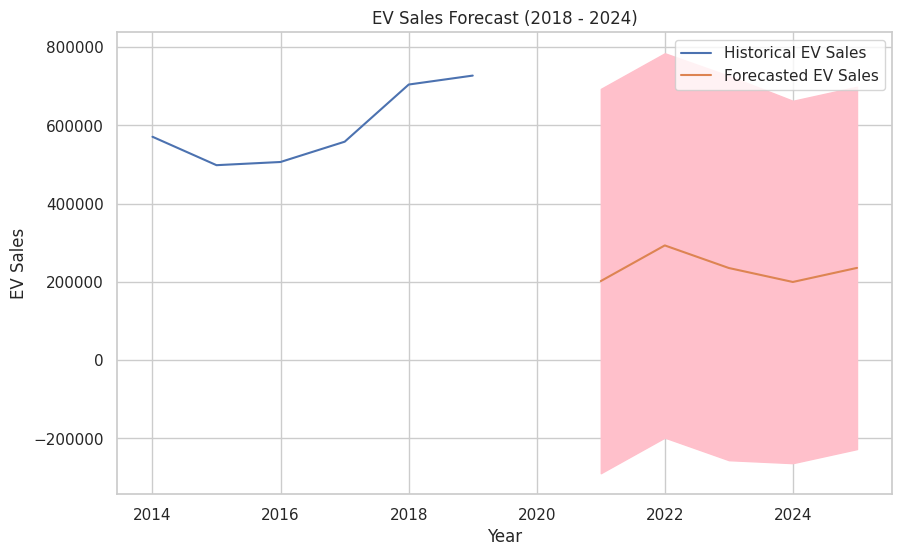

In [ ]:
# Fit the SARIMAX model using the entire dataset
sarimax_model = SARIMAX(combined_data['EV_Sales'],
                        order=(0, 0, 0),
                        seasonal_order=(0, 1, 1, 12),
                        exog=data['Scaled_Gasoline_Prices'])
results = sarimax_model.fit()

# Forecast the next 5 years
# Convert an integer year to a datetime object representing the end of that year
last_year = train.index[-1]  # This should be the last year in your dataset, e.g., 2020
last_date = pd.to_datetime(f"{last_year}-12-31")  # Convert to December 31st of the last year


future_exog = pd.DataFrame({
    'Scaled_Gasoline_Prices': [0.5, 0.5, 0.5, 0.5, 0.5]  # Placeholder, replace with actual forecasts or assumptions
}, index=pd.date_range(start=data.index[-1] + pd.offsets.DateOffset(years=1), periods=5, freq='Y'))

forecast = results.get_forecast(steps=5, exog=future_exog)

# Get the forecast and the confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index[-6:], combined_data['EV_Sales'][-6:], label='Historical EV Sales')  # Plotting from 2018 to 2019
plt.plot(future_exog.index, forecast_values, label='Forecasted EV Sales')  # Plotting the forecasted values
plt.fill_between(future_exog.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.title('EV Sales Forecast (2018 - 2024)')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.legend()
plt.show()

# Model test and Performance - Gradient Boosting



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
data = combined_data

# Feature Engineering: Create lagged variables
num_lags = 3  # number of lags to create
for i in range(1, num_lags + 1):
    data[f'lag_{i}'] = data['EV_Sales'].shift(i)

# Drop any rows with NaN values created by lagging
data.dropna(inplace=True)

# Split data into train and test sets
X = data[['lag_1', 'lag_2', 'lag_3']]  # adjust based on the number of lags used
y = data['EV_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the Gradient Boosting model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Forecast
predictions = gbm.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Print performance metrics
print(f'Test MAE: {mae}')
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}');
print(f'Test MAPE: {mape}%')

Test MAE: 142783.45474112043
Test MSE: 27647870412.621906
Test RMSE: 166276.4878526784
Test MAPE: 20.24717476117069%


# Model Test and Performance LSTM

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Assuming data is already loaded into the variable 'data'
data = combined_data
# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1,1))

# Split data into training and test sets
train_size = int(len(scaled_data) * 0.67)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions back to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/100
58/58 - 1s - loss: 0.1146 - 1s/epoch - 25ms/step
Epoch 2/100
58/58 - 0s - loss: 0.0881 - 68ms/epoch - 1ms/step
Epoch 3/100
58/58 - 0s - loss: 0.0734 - 71ms/epoch - 1ms/step
Epoch 4/100
58/58 - 0s - loss: 0.0653 - 73ms/epoch - 1ms/step
Epoch 5/100
58/58 - 0s - loss: 0.0617 - 82ms/epoch - 1ms/step
Epoch 6/100
58/58 - 0s - loss: 0.0602 - 77ms/epoch - 1ms/step
Epoch 7/100
58/58 - 0s - loss: 0.0595 - 70ms/epoch - 1ms/step
Epoch 8/100
58/58 - 0s - loss: 0.0594 - 71ms/epoch - 1ms/step
Epoch 9/100
58/58 - 0s - loss: 0.0593 - 70ms/epoch - 1ms/step
Epoch 10/100
58/58 - 0s - loss: 0.0593 - 74ms/epoch - 1ms/step
Epoch 11/100
58/58 - 0s - loss: 0.0593 - 78ms/epoch - 1ms/step
Epoch 12/100
58/58 - 0s - loss: 0.0593 - 69ms/epoch - 1ms/step
Epoch 13/100
58/58 - 0s - loss: 0.0594 - 73ms/epoch - 1ms/step
Epoch 14/100
58/58 - 0s - loss: 0.0592 - 72ms/epoch - 1ms/step
Epoch 15/100
58/58 - 0s - loss: 0.0592 - 68ms/epoch - 1ms/step
Epoch 16/100
58/58 - 0s - loss: 0.0596 - 66ms/epoch - 1ms/step
Ep

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming testPredict and testY are available from the previous steps

# Inverting the scaling for actual values to calculate errors
testY_actual = scaler.inverse_transform([testY[0]])

# Calculating metrics
mse = mean_squared_error(testY_actual[0], testPredict[:,0])
rmse = np.sqrt(mse)
mae = mean_absolute_error(testY_actual[0], testPredict[:,0])
mape = np.mean(np.abs((testY_actual[0] - testPredict[:,0]) / testY_actual[0])) * 100

print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f%%' % mape)

Test MSE: 111322389075842985623552.000
Test RMSE: 333650099768.969
Test MAE: 265316167494.018
Test MAPE: 90.138%


# Test Graph

In [ ]:
# Setting the unnamed year column as the index
data = data.set_index('Unnamed: 0')

# Splitting the data into training and forecasting periods
train = data[:2017]  # Data up to 2017 for training
end_year = 2024  # Forecasting up to 2024

# Define and fit the SARIMAX model (using simple placeholder orders, these should ideally be tuned based on the data)
sarimax_model = SARIMAX(train['EV_Sales'],
                        order=(1, 1, 1),  # Placeholder p, d, q values
                        seasonal_order=(1, 1, 1, 12),  # Placeholder P, D, Q, s values
                        exog=train['Gasoline_Prices'])
results = sarimax_model.fit(disp=False)

# Forecasting from 2018 to 2024
forecast_years = list(range(2018, end_year + 1))  # Years to forecast
forecast = results.get_forecast(steps=len(forecast_years), exog=data.loc[forecast_years, 'Gasoline_Prices'])

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Data for plotting
historical_years = train.index
historical_sales = train['EV_Sales']

# Prepare the results to display
forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Forecasted EV Sales': forecast_values.round(0)
})

# Combine historical and forecasted data for plotting
plot_data = pd.concat([
    pd.DataFrame({'Year': historical_years, 'EV Sales': historical_sales, 'Type': 'Historical'}),
    pd.DataFrame({'Year': forecast_years, 'EV Sales': forecast_values.round(0), 'Type': 'Forecasted'})
])

plot_data.head(), forecast_df.head()


KeyError: "None of ['Unnamed: 0'] are in the columns"

In [ ]:
# Assuming constant future Gasoline Prices at the last known value from 2019
last_known_gas_price = data['Gasoline_Prices'].iloc[-1]

# Creating future exogenous variables with the assumed constant Gasoline Prices
future_exog = pd.DataFrame({
    'Gasoline_Prices': [last_known_gas_price] * len(forecast_years)
}, index=forecast_years)

# Re-fitting the SARIMAX model and forecasting with the new exogenous data
forecast = results.get_forecast(steps=len(forecast_years), exog=future_exog)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Prepare the results to display
forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Forecasted EV Sales': forecast_values.round(0)
})

# Combine historical and forecasted data for plotting
plot_data = pd.concat([
    pd.DataFrame({'Year': historical_years, 'EV Sales': historical_sales, 'Type': 'Historical'}),
    pd.DataFrame({'Year': forecast_years, 'EV Sales': forecast_values.round(0), 'Type': 'Forecasted'})
])

# Checking the final structure before plotting
plot_data.head(), forecast_df.head()


In [ ]:
# Re-defining historical data variables
historical_years = data.index
historical_sales = data['EV_Sales']

# Creating future exogenous variables with the assumed constant Gasoline Prices
future_exog = pd.DataFrame({
    'Gasoline_Prices': [last_known_gas_price] * len(forecast_years)
}, index=forecast_years)

# Re-fitting the SARIMAX model and forecasting with the new exogenous data
forecast = results.get_forecast(steps=len(forecast_years), exog=future_exog)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Prepare the results to display
forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Forecasted EV Sales': forecast_values.round(0)
})

# Combine historical and forecasted data for plotting
plot_data = pd.concat([
    pd.DataFrame({'Year': historical_years, 'EV Sales': historical_sales, 'Type': 'Historical'}),
    pd.DataFrame({'Year': forecast_years, 'EV Sales': forecast_values.round(0), 'Type': 'Forecasted'})
])

# Checking the final structure before plotting
plot_data.tail(), forecast_df.head()


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Plotting historical and forecasted EV Sales
plt.figure(figsize=(12, 6))

# Plotting historical data
plt.plot(plot_data[plot_data['Type'] == 'Historical']['Year'], plot_data[plot_data['Type'] == 'Historical']['EV Sales'], label='Historical EV Sales', color='blue')

# Plotting forecasted data
plt.plot(plot_data[plot_data['Type'] == 'Forecasted']['Year'], plot_data[plot_data['Type'] == 'Forecasted']['EV Sales'], label='Forecasted EV Sales', color='red', linestyle='--')

# Adding titles and labels
plt.title('Historical and Forecasted EV Sales (2018 - 2024)')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.legend()
plt.grid(visible=True)

plt.show()


NameError: name 'plot_data' is not defined

<Figure size 1200x600 with 0 Axes>